In [1]:
# Объект последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Полносвязный слой нейронной сети
from tensorflow.keras.layers import Dense

# Вспомогательный модуль Keras для предварительной обработки данных
from tensorflow.keras import utils

import numpy as np

import pandas as pd

import os

from numpy.random import seed
seed(2020)

from tensorflow.random import set_seed
set_seed(2020)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Смотрим список файлов
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nnfashinmnist/sample_submission.csv
/kaggle/input/nnfashinmnist/train.csv
/kaggle/input/nnfashinmnist/test.csv


In [3]:
# Чтение файлов
train_df = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/train.csv', index_col='id')
test_df = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/test.csv', index_col='id')
sample_submission = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/sample_submission.csv', index_col='id')

In [4]:
# Запись данных в x_train и y_train
# values для записи данных в массив
# train_df.iloc[:, :-1] запись все строки и начиная с 0 столбца по -1 (т.е. без последнего)
x_train, y_train = train_df.iloc[:, :-1].values, train_df['label'].values
x_test = test_df.values

In [5]:
# Проверка совпадения количества признаков в тренировочной и тестовой выборке
x_train.shape[1] == x_test.shape[1]

True

In [6]:
classes = {0:'футболка', 1:'брюки', 2:'свитер', 3:'платье', 4:'пальто',
           5:'туфли', 6:'рубашка', 7:'кроссовки', 8:'сумка', 9:'ботинки'}

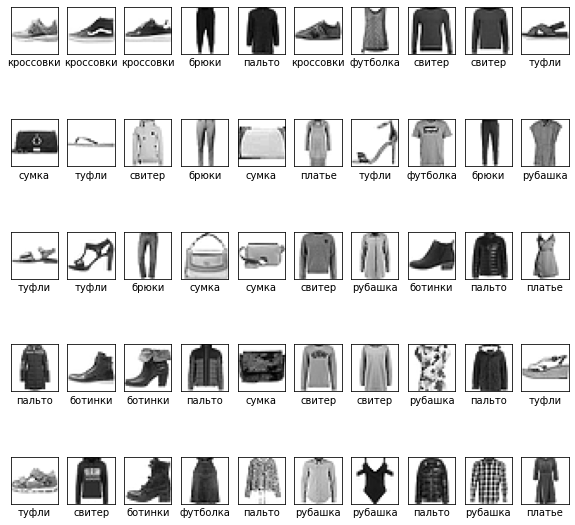

In [7]:
# Пример изображения в наборе
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# Кодирование ответа
# 7 = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] в 7 элементе будет 1
y_train = utils.to_categorical(y_train)

In [10]:
seed(2020)
set_seed(2020)

# Создание последовательной модели
model = Sequential()

# Создание полносвязного входного слоя, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(units=800, input_dim=784, activation='relu'))
model.add(Dense(units=400, activation='relu'))
# Создание полносвзяного выходного слоя, 10 нейронов, т.к. 10 классов
model.add(Dense(units=10, activation='softmax'))

In [11]:
seed(2020)
set_seed(2020)
# Компилируме сеть
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [12]:
# Смотрим нашу модель
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
seed(2020)
set_seed(2020)
# Обучение модели
history = model.fit(x_train, y_train,
                   batch_size=200,
                   epochs=50,
                   validation_split=0.1,
                   verbose=2)

Epoch 1/50
297/297 - 5s - loss: 0.4905 - accuracy: 0.8240 - val_loss: 0.4556 - val_accuracy: 0.8310
Epoch 2/50
297/297 - 4s - loss: 0.3593 - accuracy: 0.8682 - val_loss: 0.3659 - val_accuracy: 0.8696
Epoch 3/50
297/297 - 4s - loss: 0.3199 - accuracy: 0.8822 - val_loss: 0.4399 - val_accuracy: 0.8421
Epoch 4/50
297/297 - 4s - loss: 0.3004 - accuracy: 0.8881 - val_loss: 0.3063 - val_accuracy: 0.8891
Epoch 5/50
297/297 - 4s - loss: 0.2799 - accuracy: 0.8946 - val_loss: 0.3194 - val_accuracy: 0.8888
Epoch 6/50
297/297 - 4s - loss: 0.2598 - accuracy: 0.9027 - val_loss: 0.3231 - val_accuracy: 0.8819
Epoch 7/50
297/297 - 4s - loss: 0.2499 - accuracy: 0.9055 - val_loss: 0.3202 - val_accuracy: 0.8869
Epoch 8/50
297/297 - 4s - loss: 0.2364 - accuracy: 0.9114 - val_loss: 0.2908 - val_accuracy: 0.8970
Epoch 9/50
297/297 - 4s - loss: 0.2243 - accuracy: 0.9157 - val_loss: 0.3066 - val_accuracy: 0.8932
Epoch 10/50
297/297 - 4s - loss: 0.2164 - accuracy: 0.9173 - val_loss: 0.3060 - val_accuracy: 0.8936

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions = np.argmax(predictions, axis=1)

In [16]:
predictions

array([0, 2, 7, ..., 6, 0, 5])

In [17]:
sample_submission['label'] = predictions

In [18]:
sample_submission.to_csv('sample_submission.csv')

In [19]:
sample_submission

,label
id,
0,0
1,2
2,7
3,9
4,4
...,...
4195,1
4196,2
4197,6
